<a href="https://colab.research.google.com/github/Ohellay/arbitrary/blob/main/Fuji_descent_issue.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First, I import my file to my Google drive in my Colab file, then I mount my Google drive to my google colab, then locate my file on the google colab and Then copy it url and add it to the file path

In [165]:
import numpy as np

# Mount Google Drive if necessary
from google.colab import drive
drive.mount('/content/drive')

csv_path = "/content/drive/MyDrive/Colab Notebooks/mtfuji_data.csv" # Specify the file name (path)

np.set_printoptions(suppress=True) # Set prohibition of scientific notation
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)

print(fuji[130:140])


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[[  130.          35.352505   138.756638  2563.4      41888.      ]
 [  131.          35.35418    138.753742  2703.1      42210.      ]
 [  132.          35.355855   138.750846  2825.55     42532.      ]
 [  133.          35.35753    138.74795   2967.9      42854.      ]
 [  134.          35.359205   138.745054  3087.81     43177.      ]
 [  135.          35.36088    138.742157  3266.24     43499.      ]
 [  136.          35.362555   138.739261  3434.59     43821.      ]
 [  137.          35.36423    138.736364  3600.08     44143.      ]
 [  138.          35.365904   138.733468  3679.96     44466.      ]
 [  139.          35.367579   138.730571  3664.9      44788.      ]]


DATA VISUALIZATION

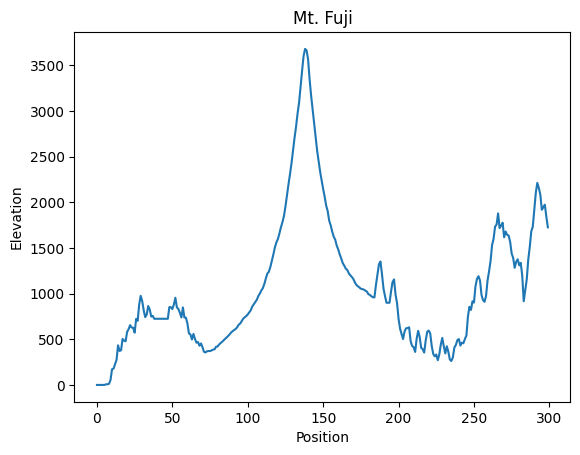

In [166]:
import matplotlib.pyplot as plt
%matplotlib inline

position = fuji[:, 0]
elevation = fuji[:, 3]

plt.title("Mt. Fuji")
plt.xlabel("Position")
plt.ylabel("Elevation")
plt.plot(position, elevation, label="Mt. Fuji Elevation")
plt.show()

[Problem 2] Create a function to calculate the gradient at a certain point

In [167]:
def calculate_gradient(position):

  return (fuji[position, 3] - fuji[position - 1, 3] ) / (position - (position - 1))





# Calculate the gradient at point 136
gradient = calculate_gradient(136)

print(f"Gradient at point 136: {gradient}")


Gradient at point 136: 168.35000000000036


[Problem 3] Create a function to calculate the destination point

In [168]:
import numpy as np


def calculate_destination_point(current_point, alpha, elevation_data):
    # Assuming elevation_data is a list or NumPy array of elevation points
    current_gradient = calculate_gradient(current_point)

    destination_point_result = current_point - alpha * current_gradient

    return np.round(destination_point_result).astype(np.int64)

elevation = fuji[:,3]
current_point = 136
alpha = 0.2

destination = calculate_destination_point(current_point, alpha, elevation)
print("Your destination is:: ", destination )



#I used alpha as 0.2 for this example and set my current point to 136

#












Your destination is::  102


In [169]:
elevation = fuji[:,3]
destination2 = calculate_destination_point(current_point=136, alpha=0.1, elevation_data=elevation)
print("Your destination is:: ", destination2)


Your destination is::  119


In [170]:
import numpy as np

array_position = np.array([135,136,137,140])

elevation = fuji[:,3]
destination3 = calculate_destination_point(array_position, alpha=0.1, elevation_data=elevation)
print("Your destination is:: ", destination3 )
print("The Gradient Descent are:: " , calculate_gradient(array_position))


Your destination is::  [117 119 120 150]
The Gradient Descent are::  [178.43 168.35 165.49 -97.14]


[Problem 4] Create a function to go down the mountain

In [171]:
def go_down_the_mountain(starting_point, alpha, elevation_data):
  path = [starting_point]

  while path[-1] not in path[: -1]:
    # Calculate the next destination point, Append the current point in the path
    path.append(calculate_destination_point(path[-1], alpha = alpha, elevation_data = elevation))

  return path[: -1]


starting_point = 136
alpha = 0.2

elevation = fuji[:, 3]

path = go_down_the_mountain(starting_point, alpha, elevation)

print("Path of descent:")
print(path)



Path of descent:
[136, 102, 98, 95, 93, 89, 85, 82, 79, 73, 70, 78, 77, 75]


[Problem 5] Visualization of the descent process

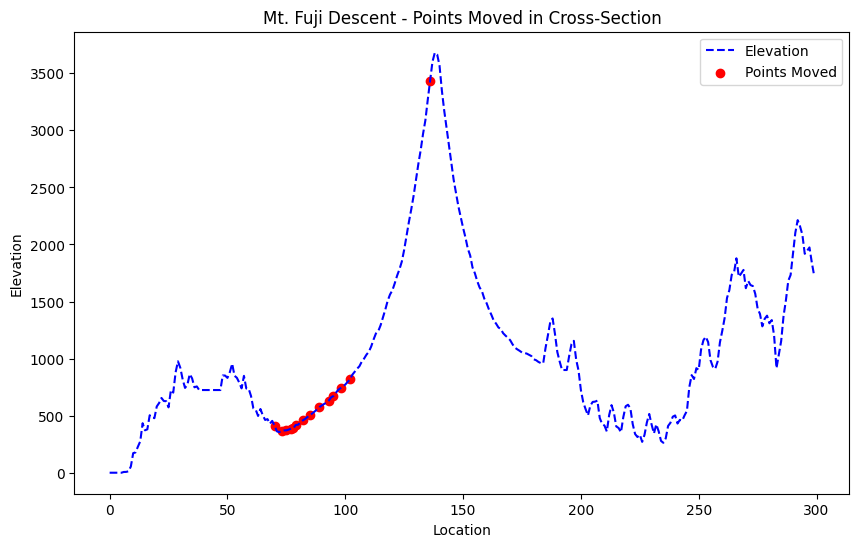

In [172]:
import matplotlib.pyplot as plt
%matplotlib inline


# Visualize the points moved in the cross-section

plt.figure(figsize=(10,6))
plt.plot(elevation, label='Elevation', color='blue', linestyle='--')
plt.scatter(path, [fuji[i, 3] for i in path], color='red', label='Points Moved')

plt.title('Mt. Fuji Descent - Points Moved in Cross-Section')
plt.xlabel('Location')
plt.ylabel('Elevation')
plt.legend()
plt.show()



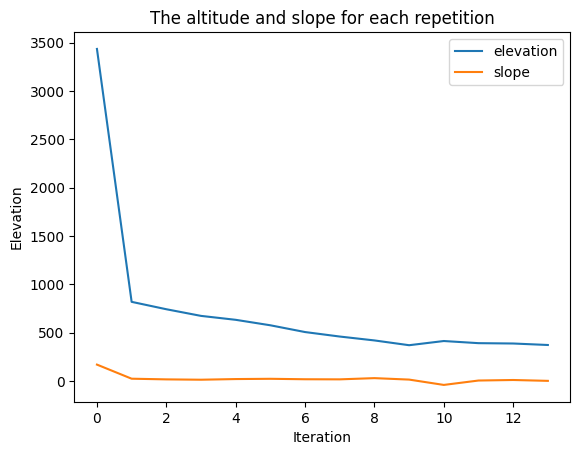

In [173]:
# Create a line graph of altitude and slope for each repetition

elevation = fuji[:, 3]
descend_elevation = elevation[path]
slope = [calculate_gradient(location) for location in path]

plt.xlabel("Iteration")
plt.ylabel("Elevation")
plt.title("The altitude and slope for each repetition")
plt.plot(descend_elevation, label= "elevation" )
plt.plot(slope, label="slope")

plt.legend()
plt.show()


[Problem 6] Change of initial value

In [174]:
all_paths = []

for i, starting_points in enumerate(range(1, 300)):
    path = go_down_the_mountain(starting_point , alpha, elevation)
    all_paths.append(path)
    print(len(all_paths))

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


[Problem 7] Visualization of the descent process for each initial value

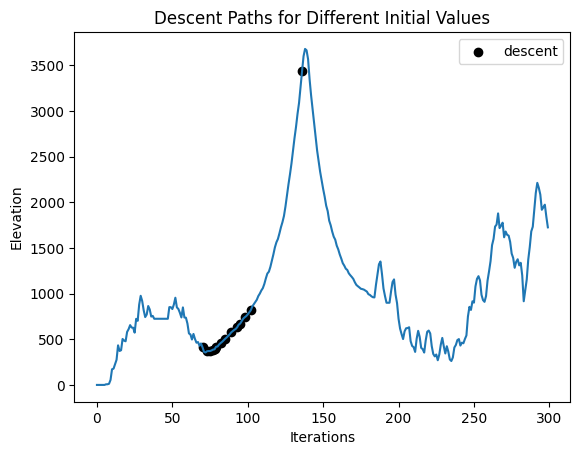

In [178]:
import matplotlib.pyplot as plt
%matplotlib inline





# Plot the descent paths
plt.plot(elevation)
plt.scatter(all_paths[141],elevation[all_paths][141], color="black", label="descent")
plt.xlabel("Iterations")
plt.ylabel("Elevation")
plt.title("Descent Paths for Different Initial Values")
plt.legend()
plt.show()


[Problem 8] (Advance problem) Hyperparameter changes
Hyper parameter
α
Visualize the descending process when you change as in question 5 . And make sure that the results vary greatly depending on the hyperparameters.



In [179]:
import numpy as np

starting_point = 136
alphas = np.array([0.005, 0.01, 0.05, 0.1, 0.5, 1])
alpha_paths = []

for i, alpha in enumerate(alphas):
  path = go_down_the_mountain(starting_point, alpha, elevation)
  alpha_paths.append(path)
  print(len(alpha_paths))

1
2
3
4
5
6
